### 폴더 구조 변경

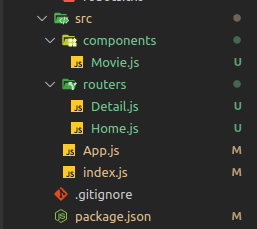

## components  / Movie.js
```jsx
import PropTypes from "prop-types";

function Movie({ title, rating, genres, coverImg, summary }) {
  return (
    <div>
      <h2>
        {title} - rating : {rating}
      </h2>
      <ul>
        {genres.map((gen, index) => {
          return <li key={index}>{gen}</li>;
        })}
      </ul>
      <img src={coverImg} alt={title} />
      <p>{summary}</p>
      <br />
    </div>
  );
}

Movie.propTypes = {
  coverImg: PropTypes.string.isRequired,
  title: PropTypes.string.isRequired,
  summary: PropTypes.string.isRequired,
  genres: PropTypes.arrayOf(PropTypes.string).isRequired,
  rating: PropTypes.number.isRequired,
};

export default Movie;

```

### routers / Detail.js
```jsx
function Detail() {
  return <h1>Detail</h1>;
}

export default Detail;

```

### routers / Home.js
```jsx
import Movie from "../components/Movie";
import { useState, useEffect } from "react";

function Home() {
  // const url =
  //   "https://yts.mx/api/v2/list_movies.json?minimum_rating=8.5&sort_by=year";
  // const url2 = "https://yts.mx/api/v2/movie_detail.json?movie_id=id";
  const [loading, setLoading] = useState(true);
  const [movies, setMovies] = useState([]);

  const getMovies = async () => {
    const response = await fetch(
      "https://yts.mx/api/v2/list_movies.json?minimum_rating=8.5&sort_by=year"
    );
    const json = await response.json();

    setMovies(json.data.movies);
    setLoading(false);
  };

  useEffect(() => {
    getMovies();
  }, []);

  return (
    <>
      {loading ? (
        <h1>Loading....</h1>
      ) : (
        <div>
          {movies.map((movie) => (
            <Movie
              key={movie.id}
              title={movie.title}
              rating={movie.rating}
              genres={movie.genres}
              coverImg={movie.medium_cover_image}
              summary={movie.summary}
            />
          ))}
        </div>
      )}
    </>
  );
}

export default Home;

```

### src / App.js


```jsx
import { BrowserRouter, Routes, Route } from "react-router-dom";

import Detail from "./routers/Detail";
import Home from "./routers/Home";

function App() {
  return (
    <BrowserRouter>
      <Routes>
        <Route index element={<Home />} />
        <Route path="movie" element={<Home />} />
        <Route path="movie/:movieId" element={<Detail />} />
      </Routes>
    </BrowserRouter>
  );
}
export default App;

```

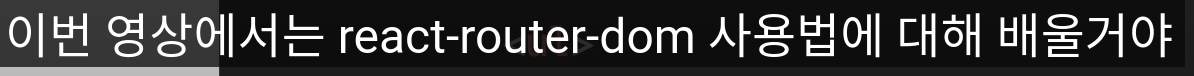

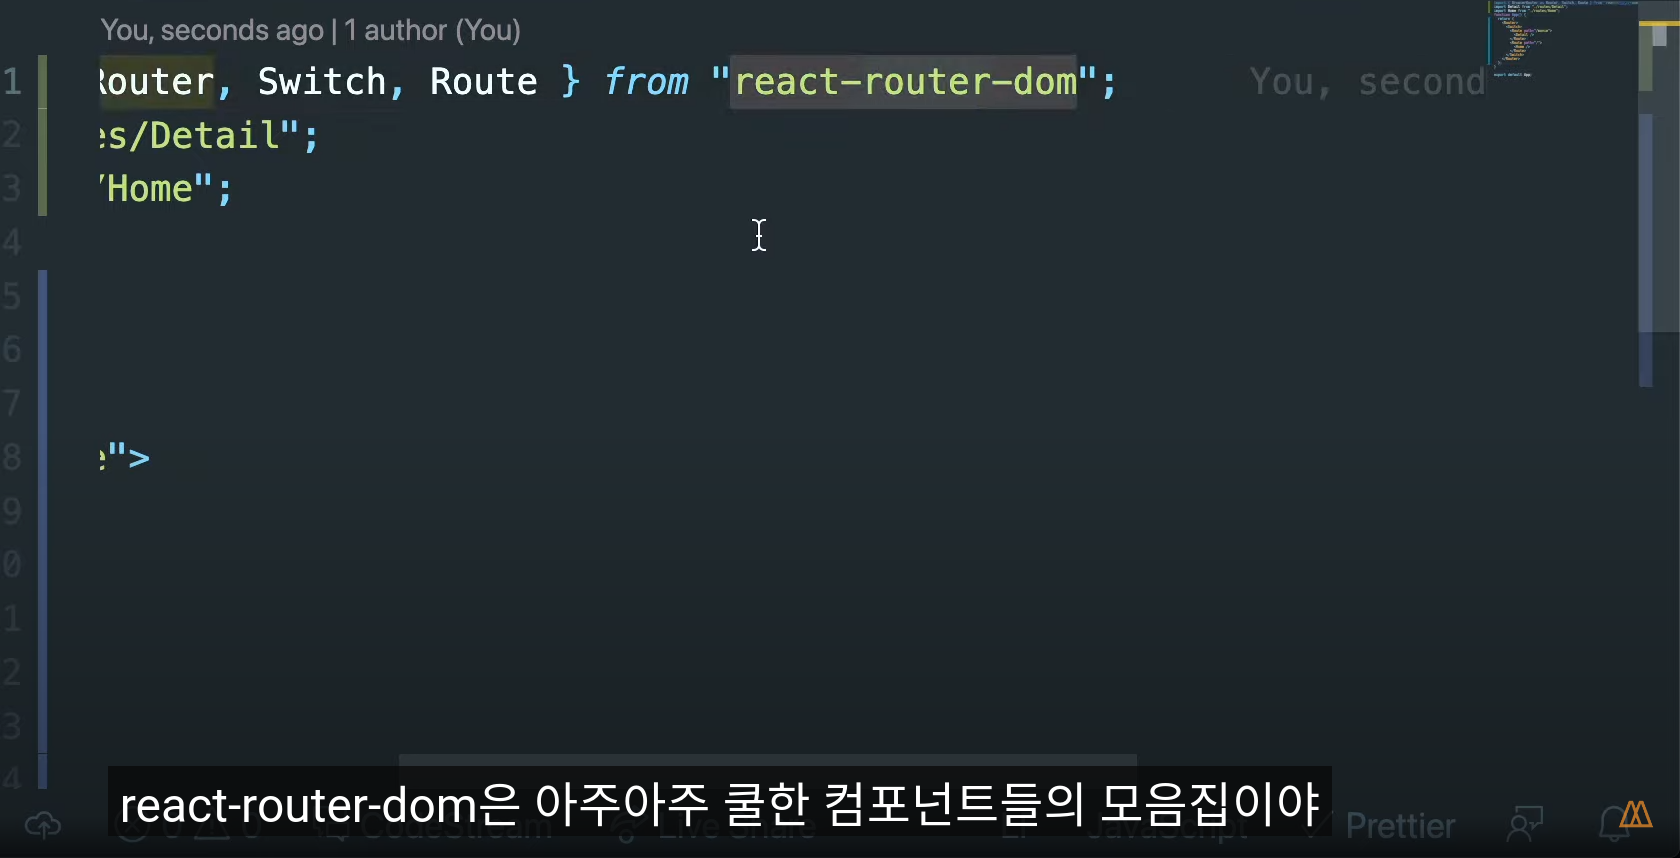


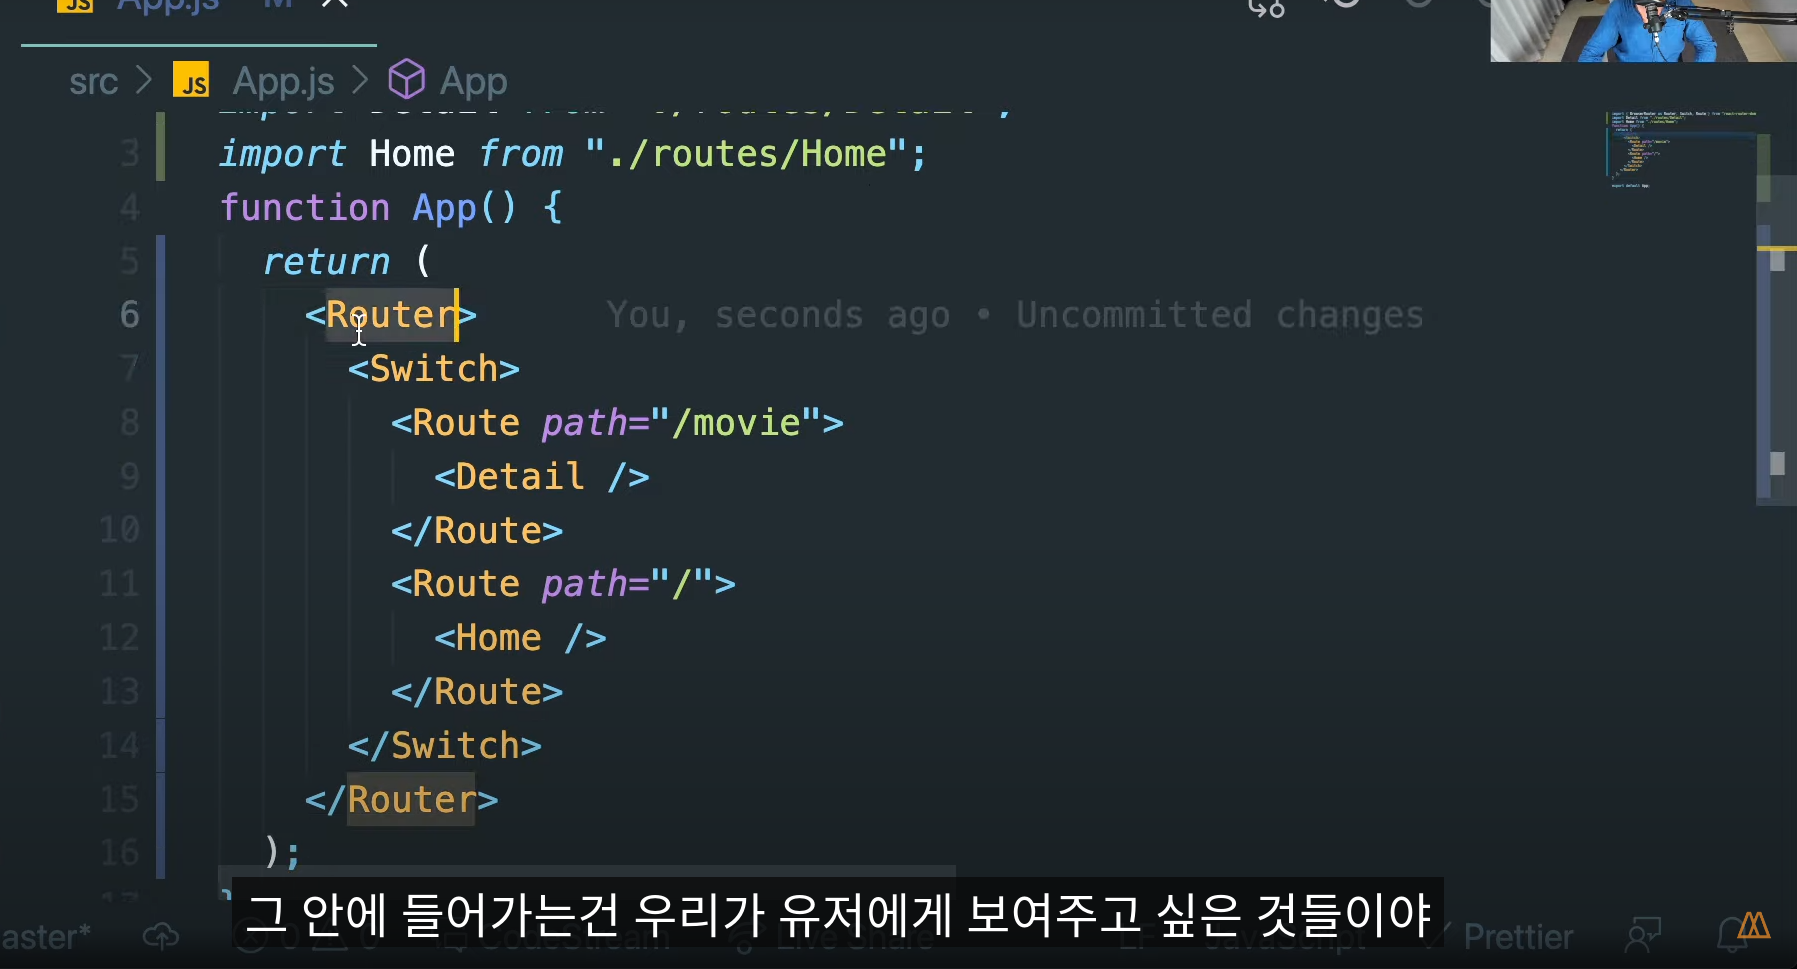

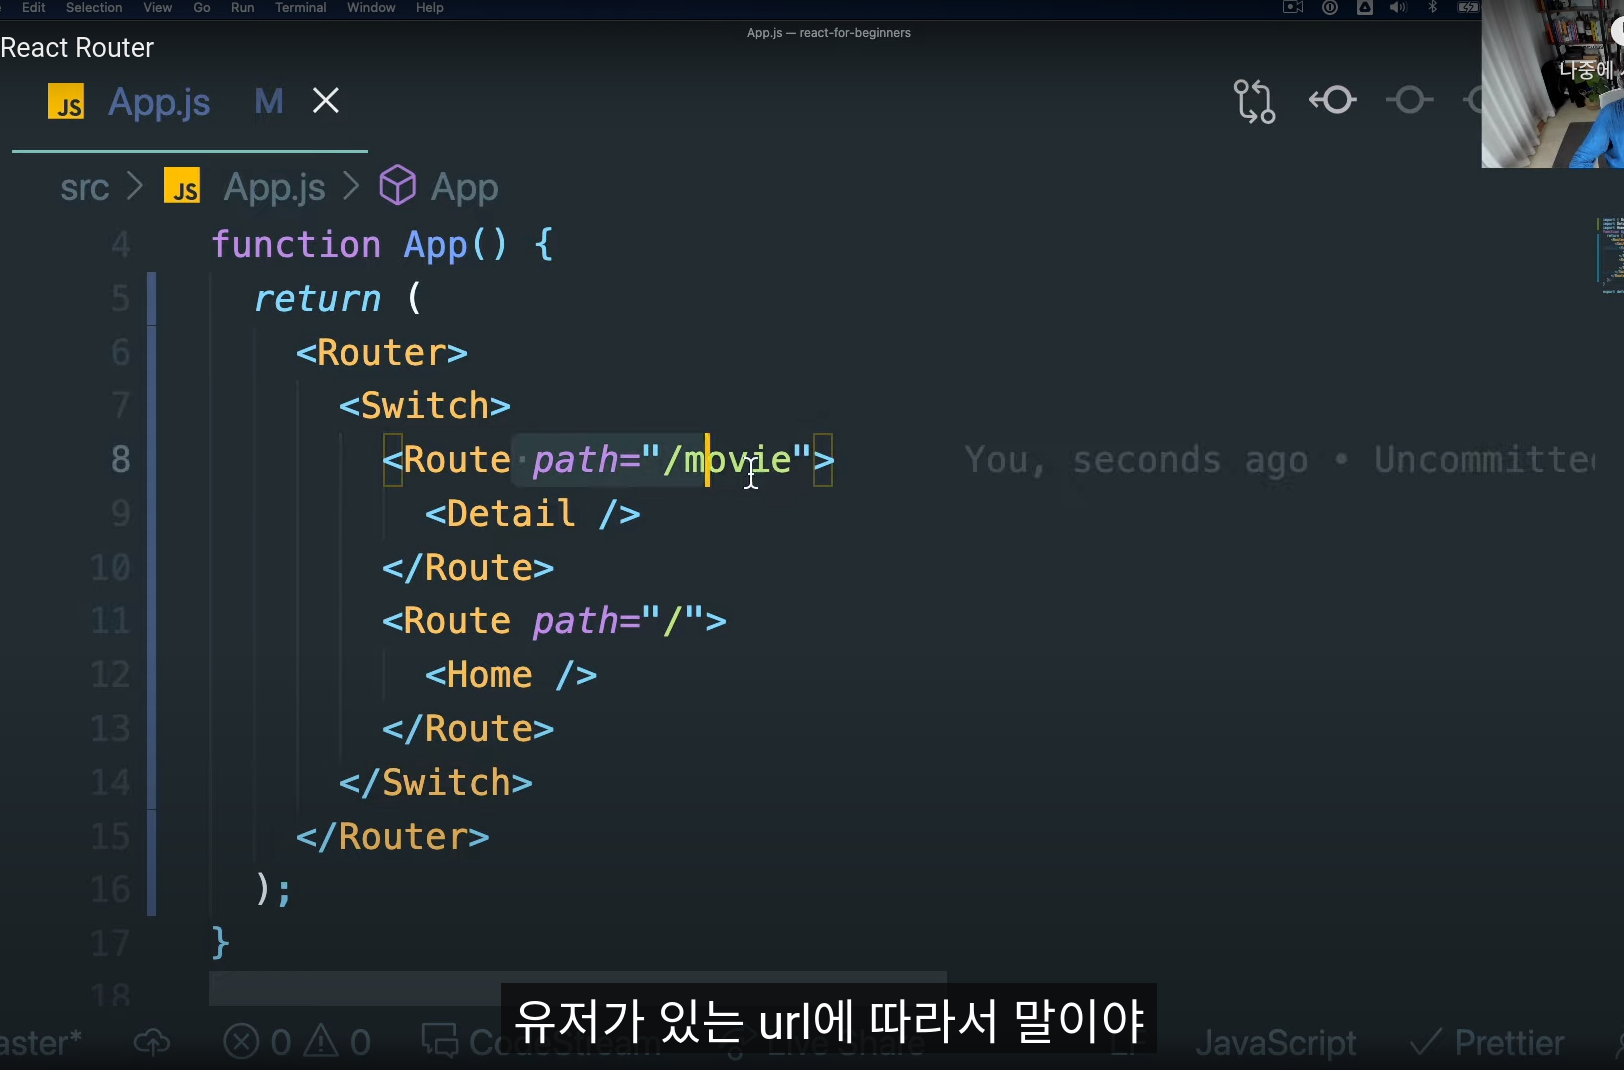

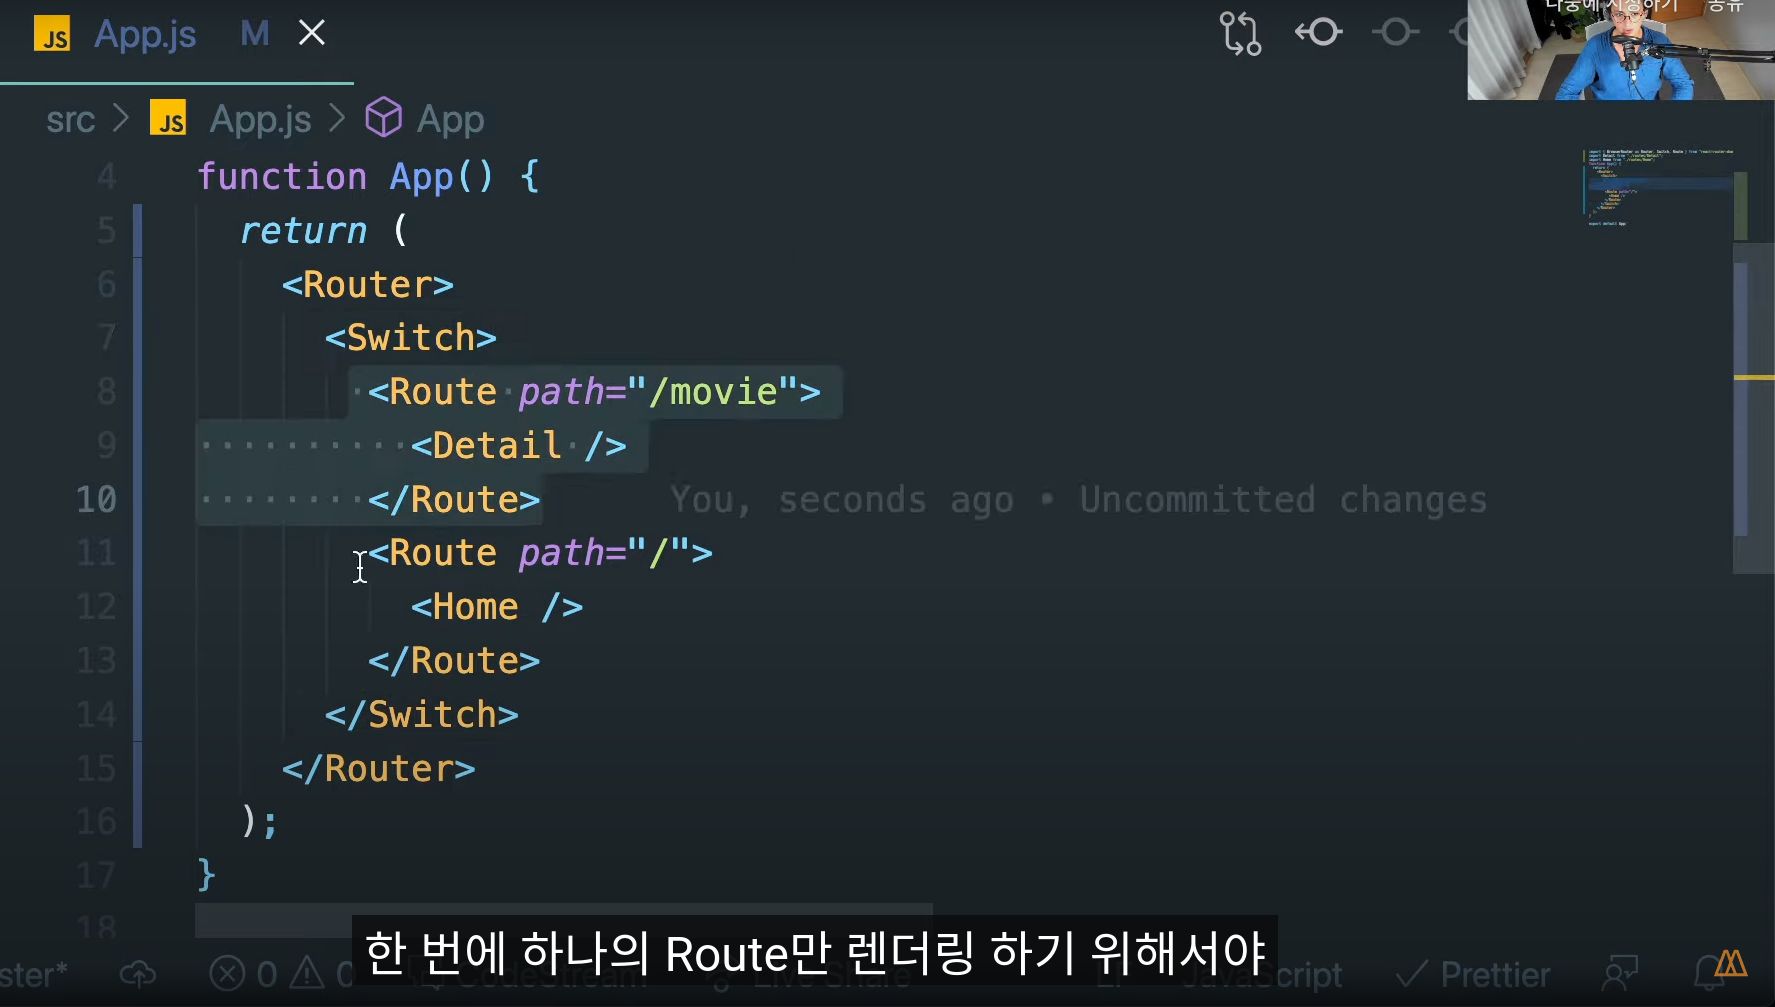

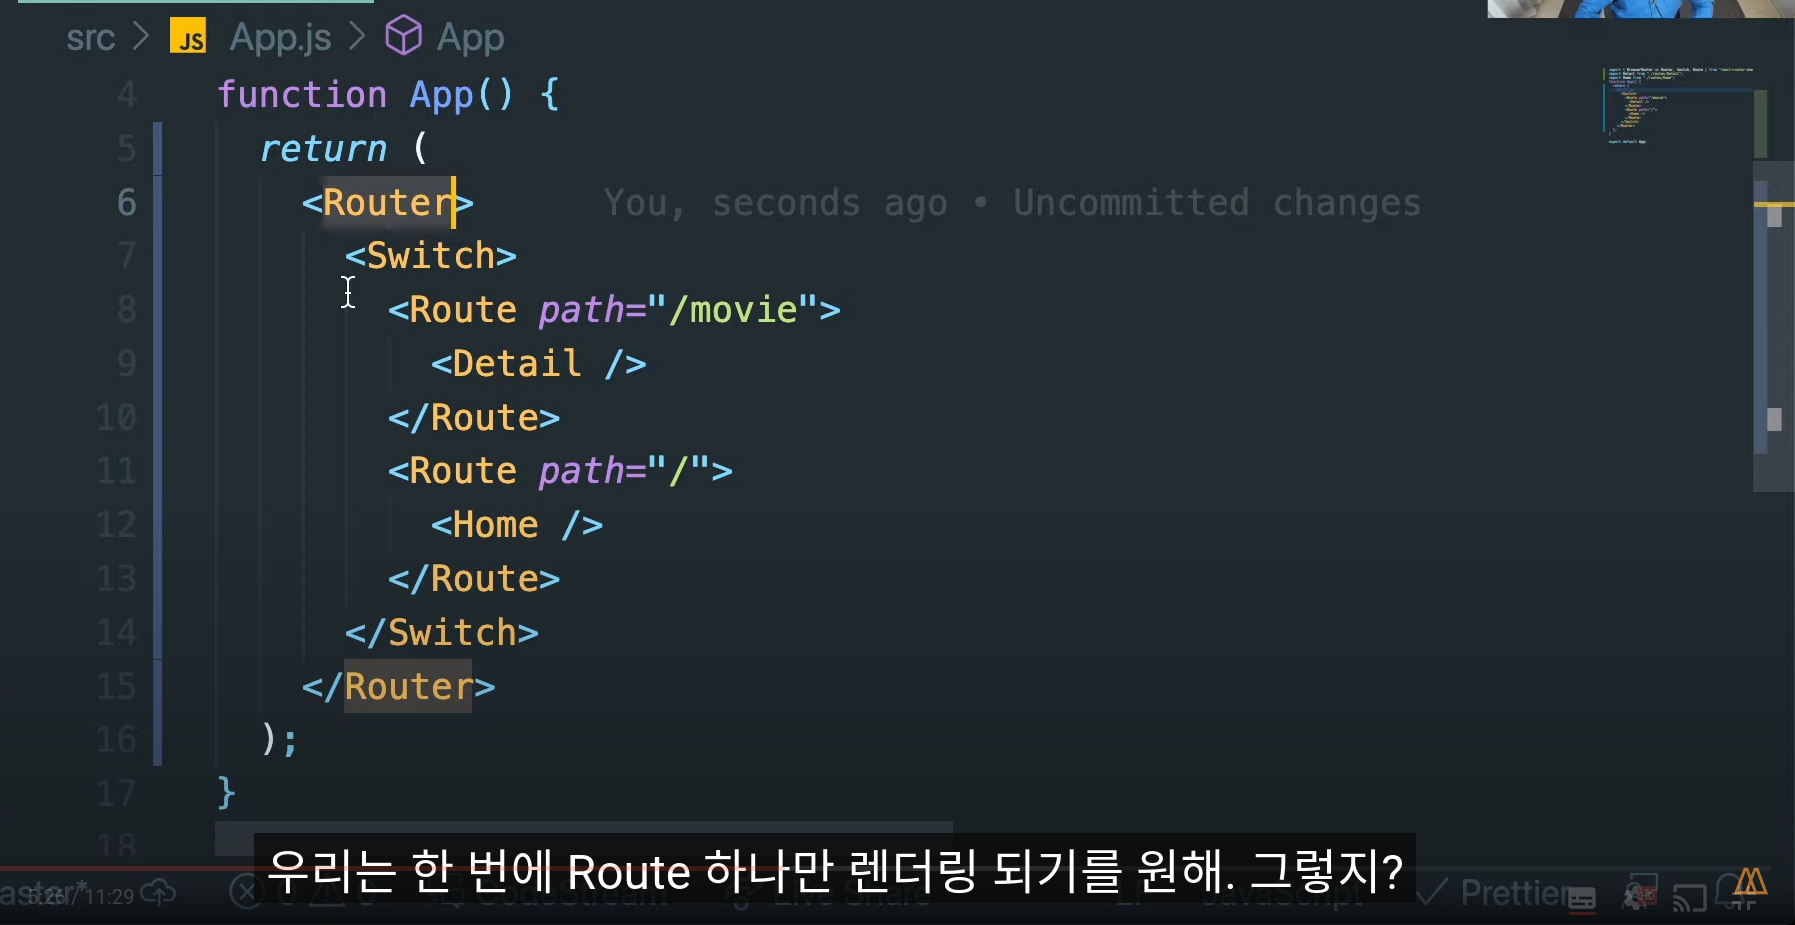

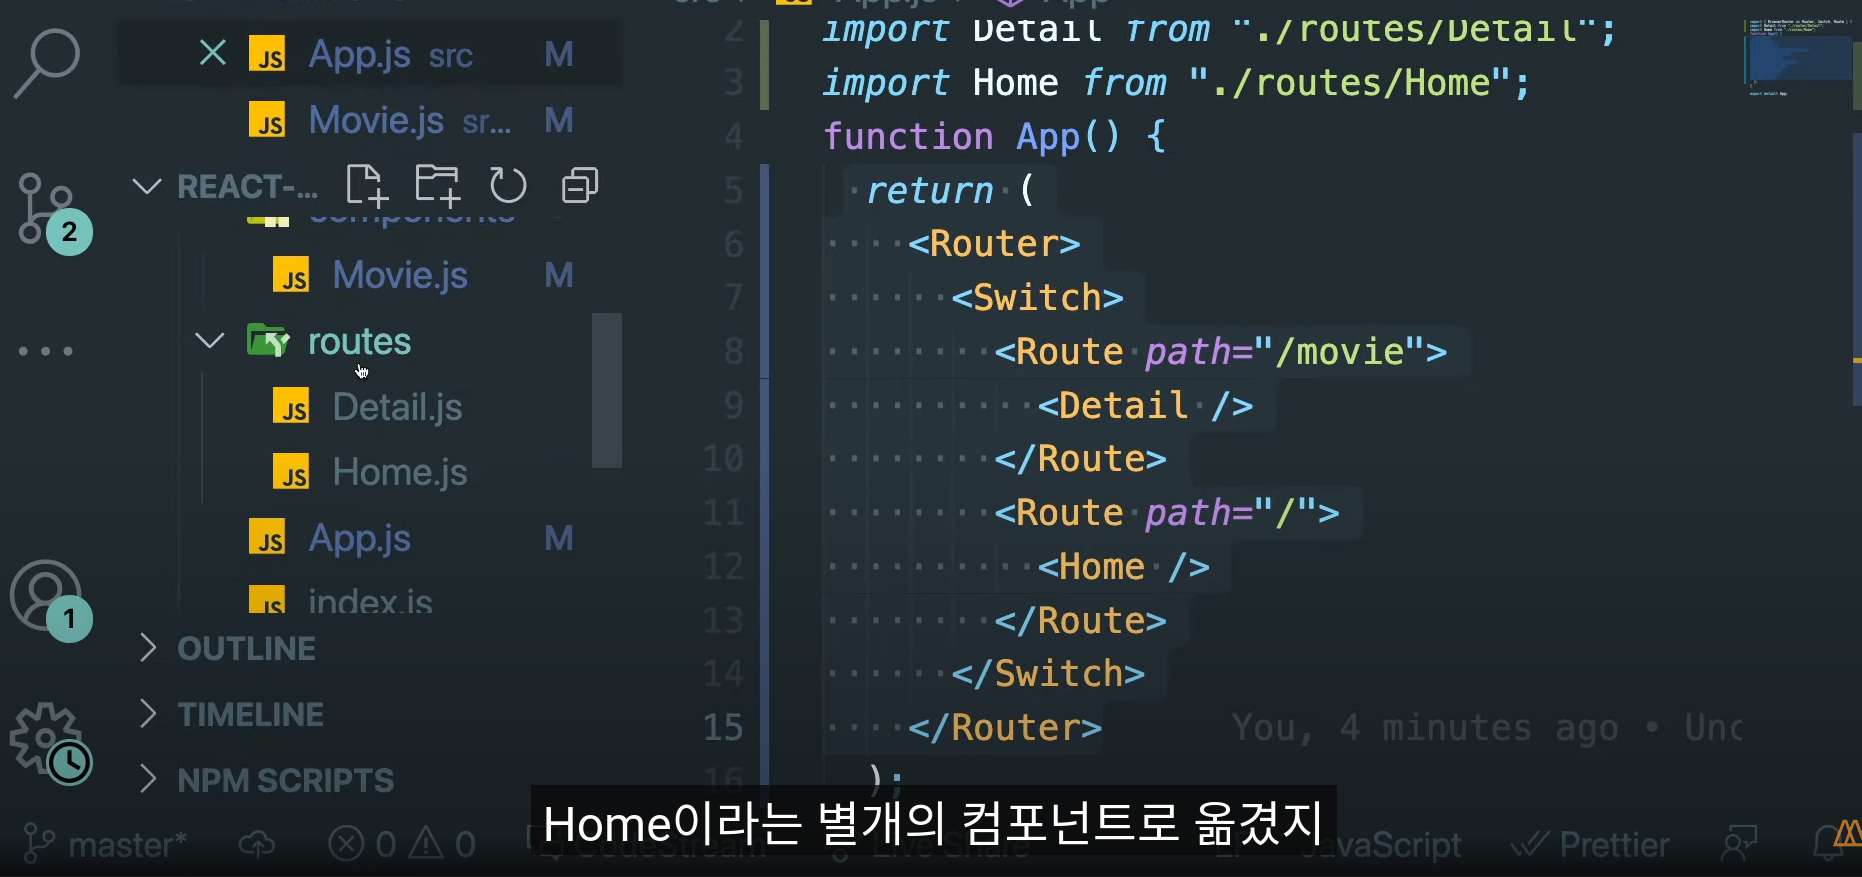

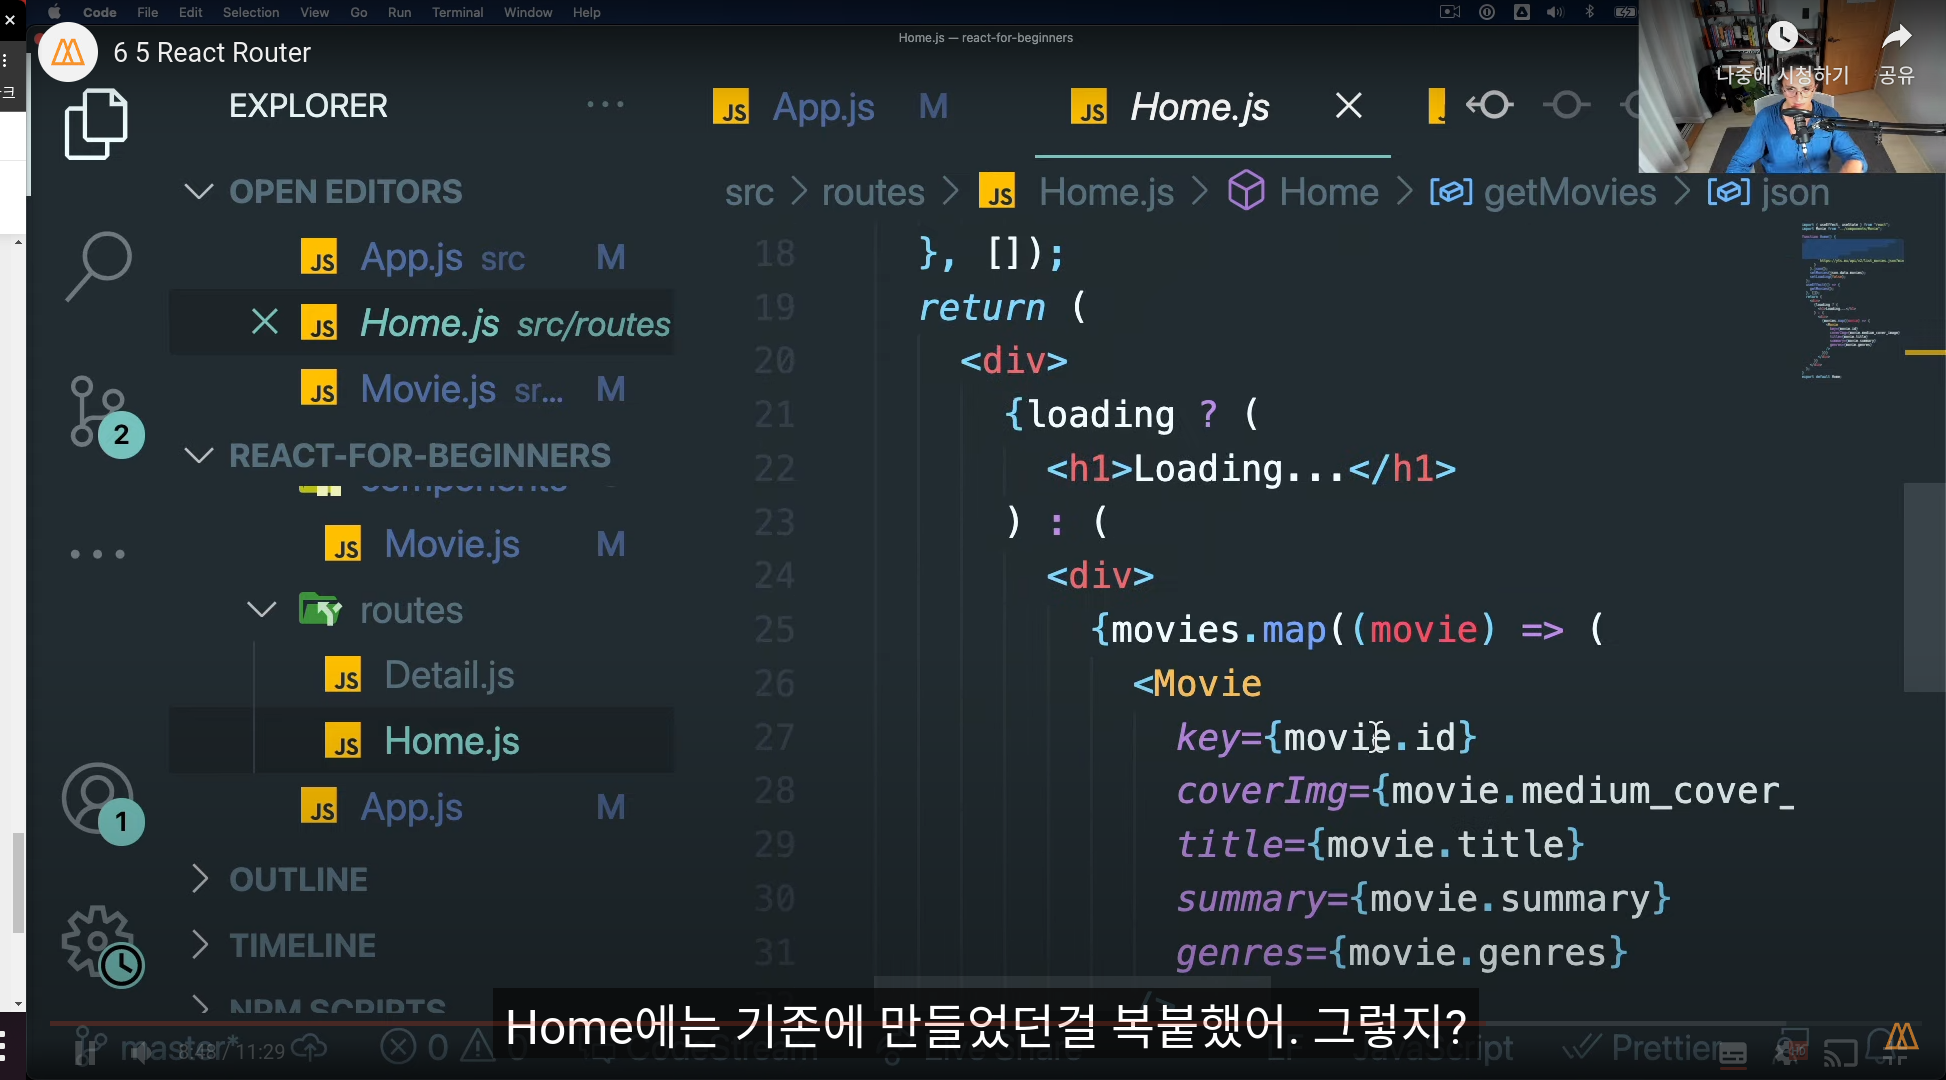

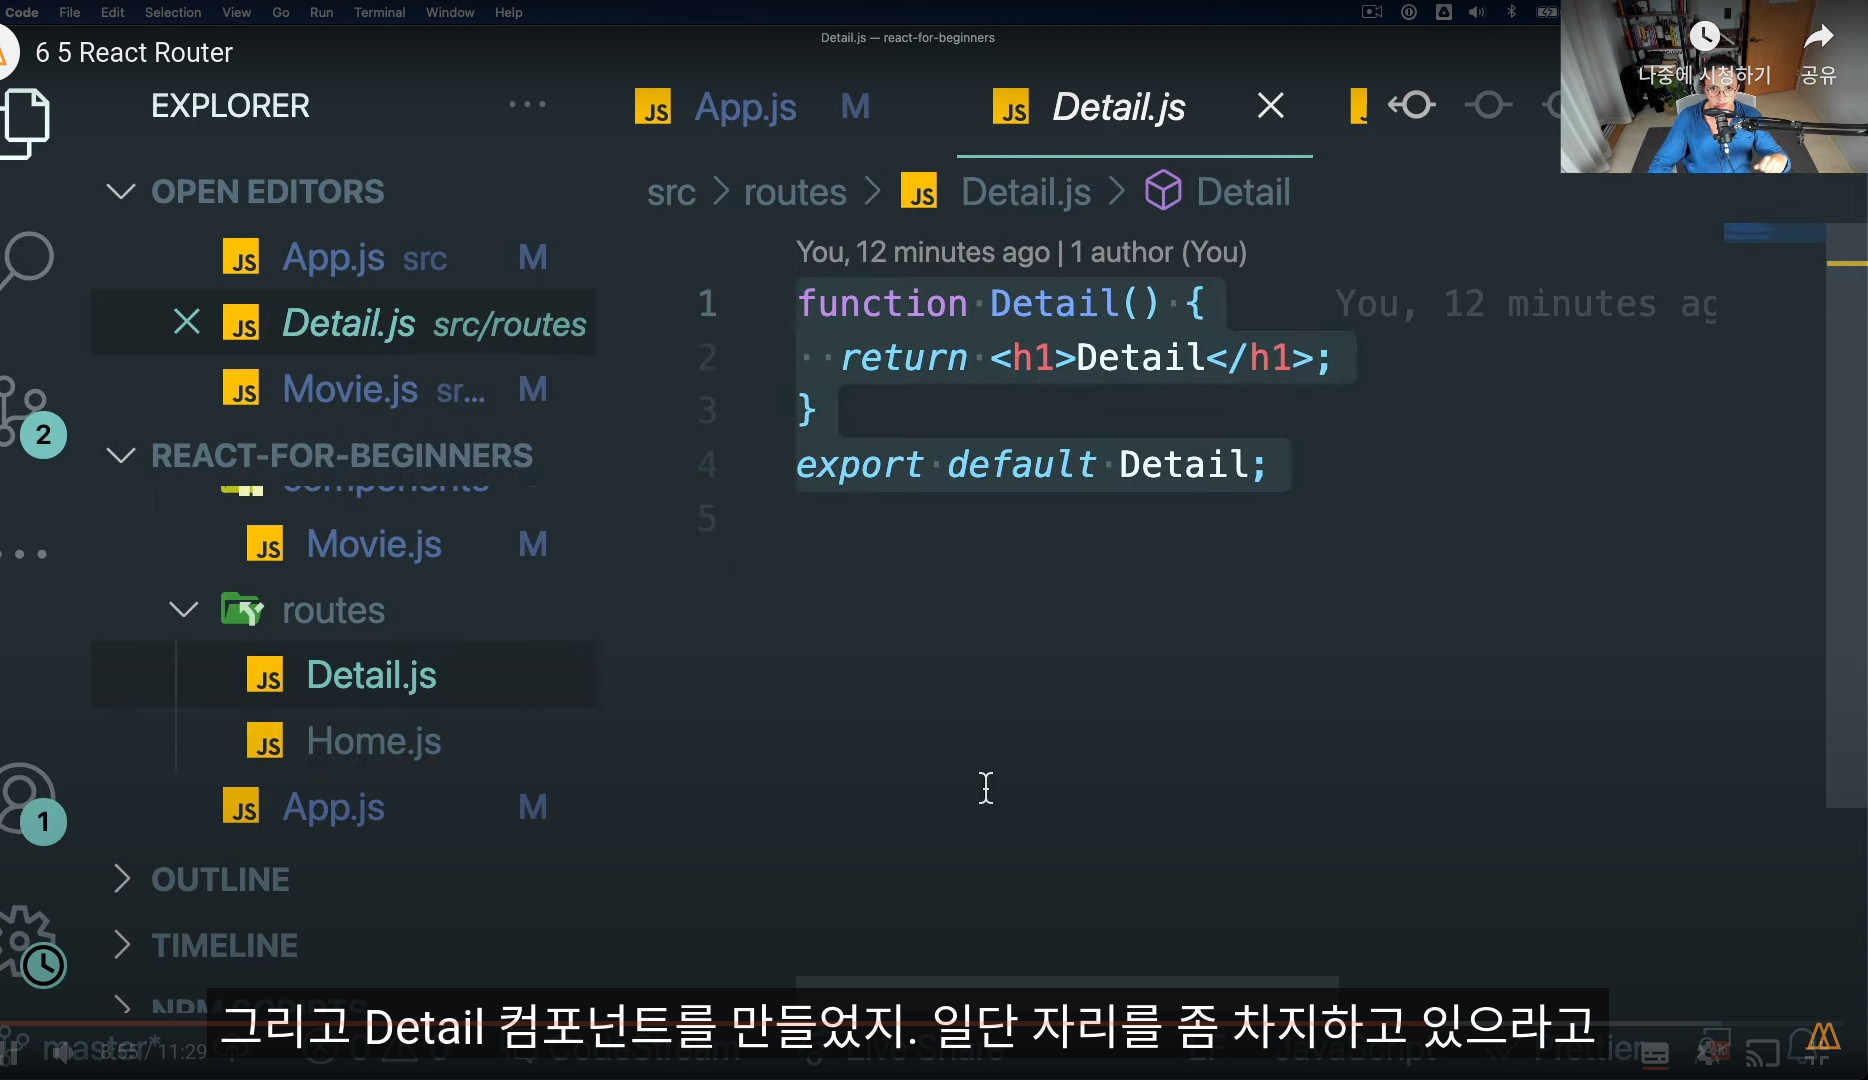

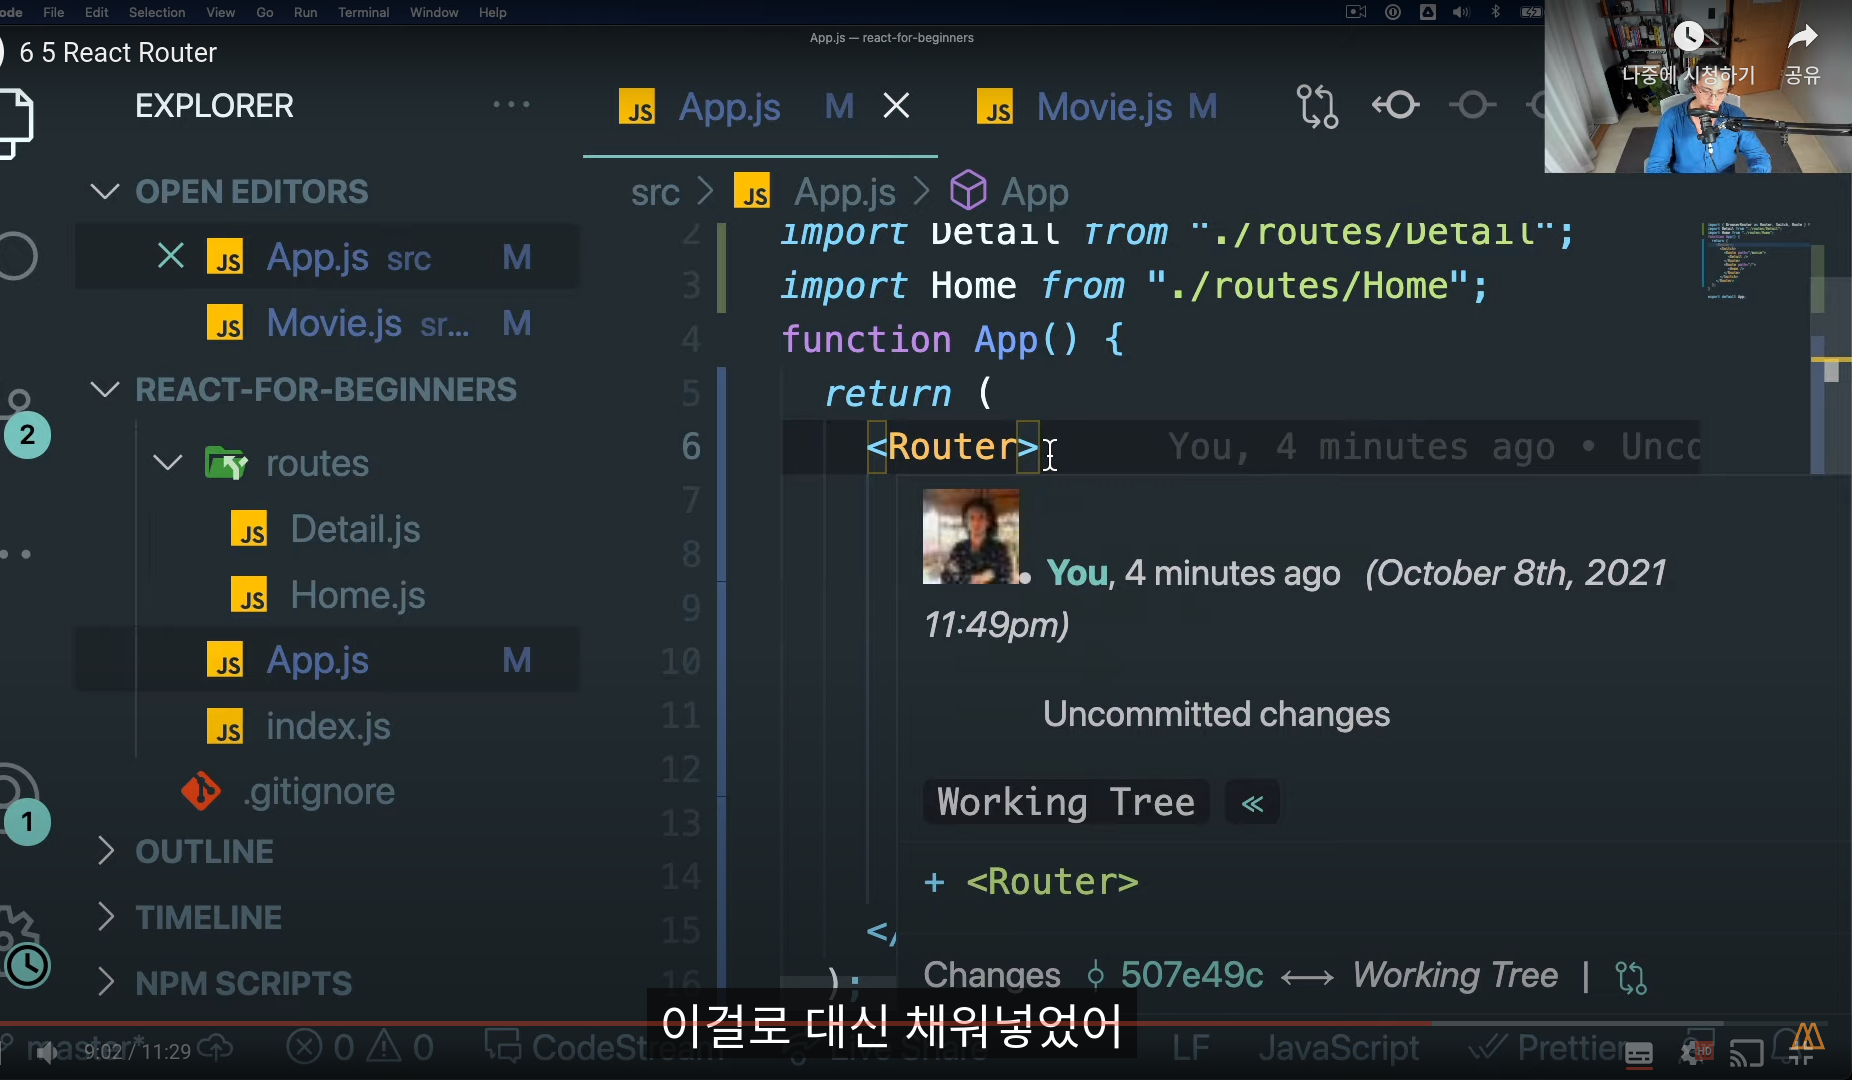

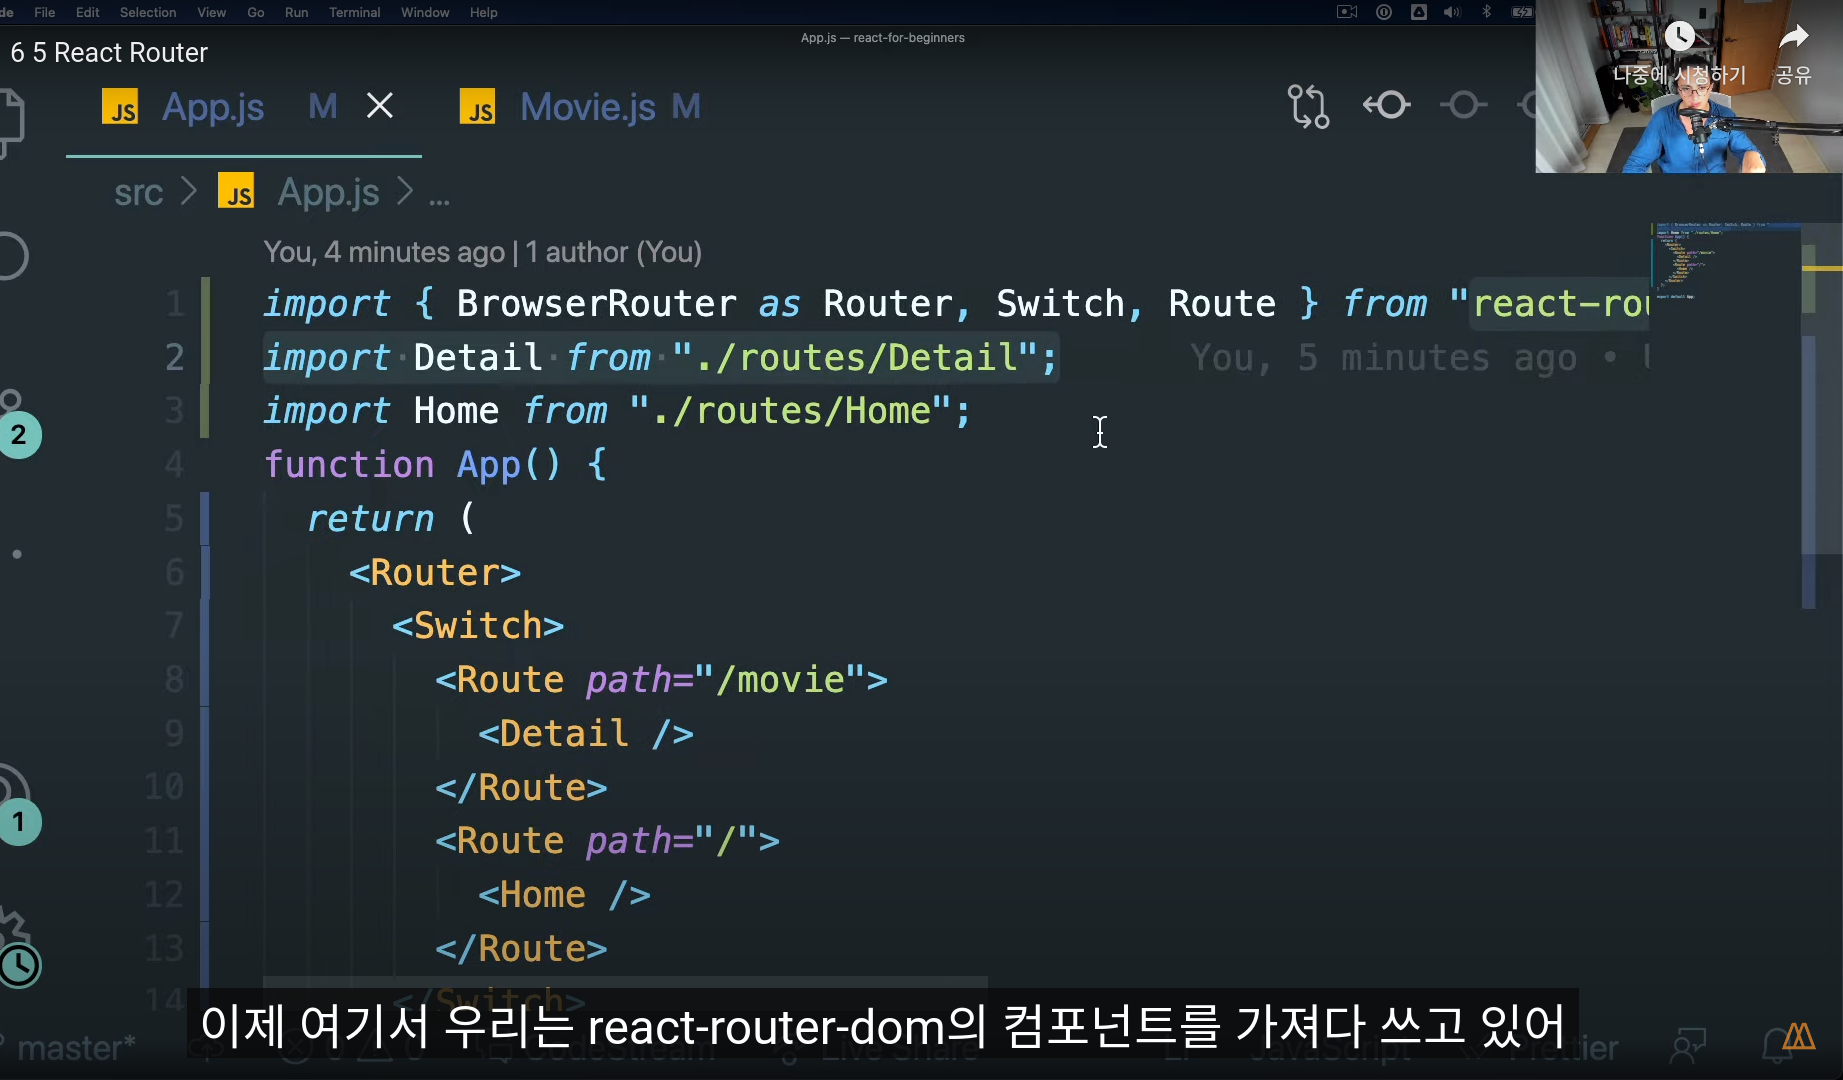

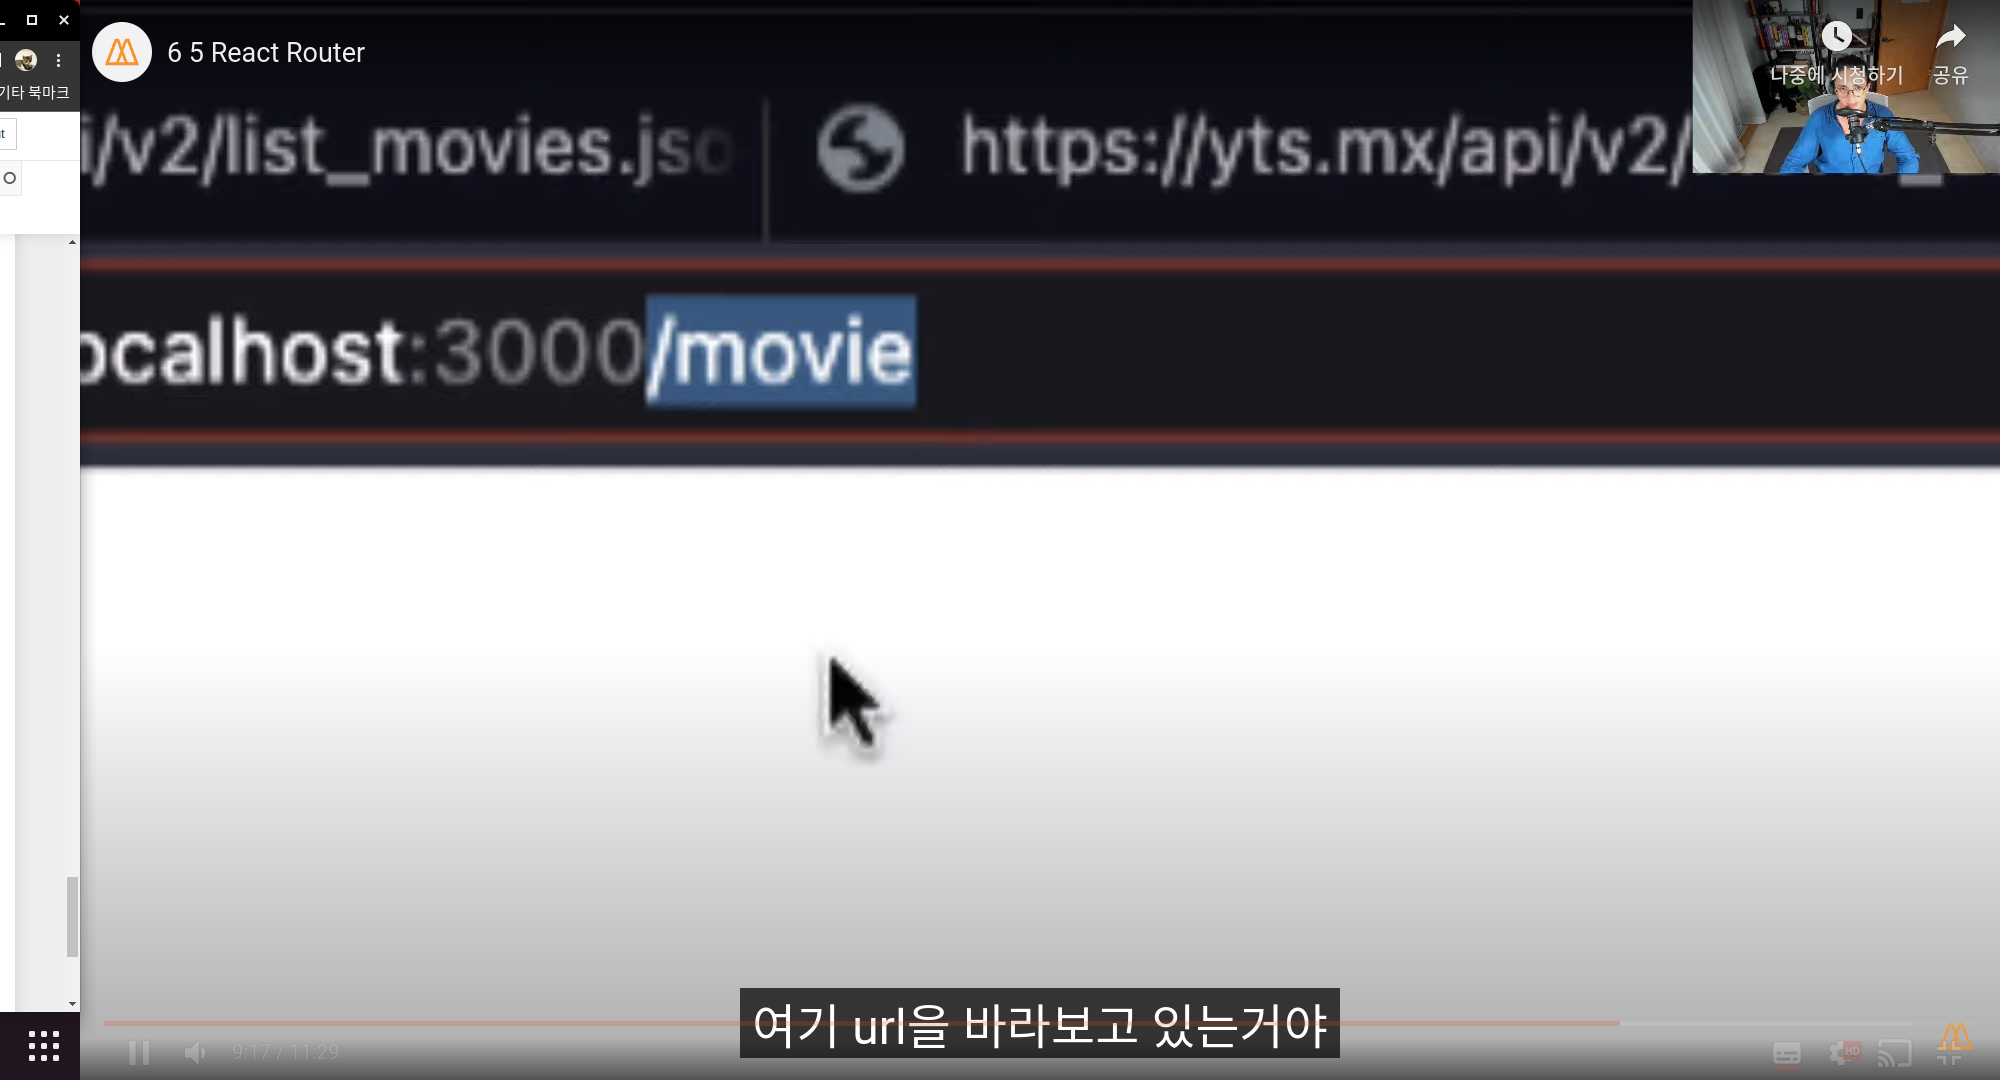

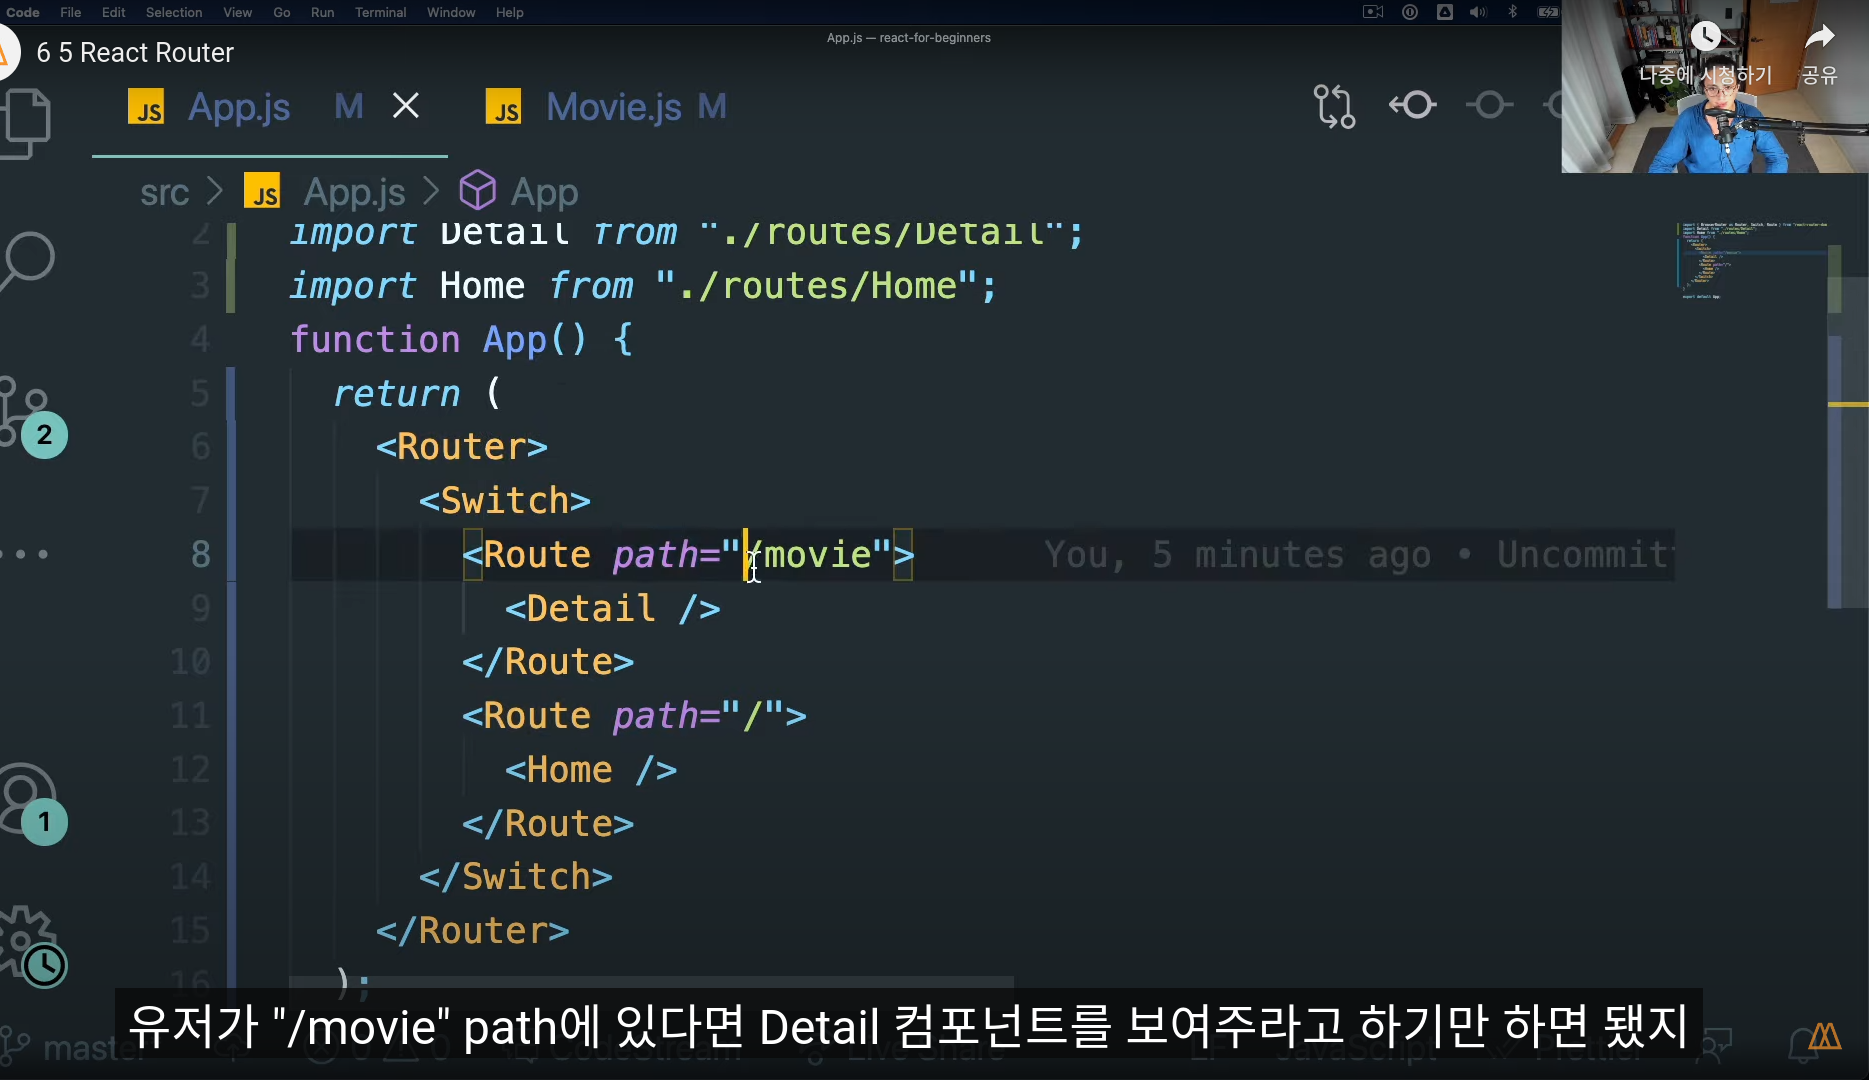